In [1]:
import pandas as pd
seoul_df = pd.read_csv('서울시 상권분석서비스(추정매출-상권)_2024년.csv',encoding='cp949')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [4]:
seoul_df.columns = seoul_df.columns.str.replace('_','')
seoul_df.columns

Index(['기준년분기코드', '상권구분코드', '상권구분코드명', '상권코드', '상권코드명', '서비스업종코드', '서비스업종코드명',
       '당월매출금액', '당월매출건수', '주중매출금액', '주말매출금액', '월요일매출금액', '화요일매출금액', '수요일매출금액',
       '목요일매출금액', '금요일매출금액', '토요일매출금액', '일요일매출금액', '시간대00~06매출금액',
       '시간대06~11매출금액', '시간대11~14매출금액', '시간대14~17매출금액', '시간대17~21매출금액',
       '시간대21~24매출금액', '남성매출금액', '여성매출금액', '연령대10매출금액', '연령대20매출금액',
       '연령대30매출금액', '연령대40매출금액', '연령대50매출금액', '연령대60이상매출금액', '주중매출건수',
       '주말매출건수', '월요일매출건수', '화요일매출건수', '수요일매출건수', '목요일매출건수', '금요일매출건수',
       '토요일매출건수', '일요일매출건수', '시간대건수~06매출건수', '시간대건수~11매출건수', '시간대건수~14매출건수',
       '시간대건수~17매출건수', '시간대건수~21매출건수', '시간대건수~24매출건수', '남성매출건수', '여성매출건수',
       '연령대10매출건수', '연령대20매출건수', '연령대30매출건수', '연령대40매출건수', '연령대50매출건수',
       '연령대60이상매출건수'],
      dtype='object')

In [6]:
# 요일별 매출 컬럼 선택
weekday_columns = ['월요일매출금액', '화요일매출금액', '수요일매출금액', 
                   '목요일매출금액', '금요일매출금액', '토요일매출금액', '일요일매출금액']

# 상관행렬 계산
weekday_corr = seoul_df[weekday_columns].corr()

print('''
상관계수는 두 변수 간 선형 관계의 강도와 방향을 나타내는 지표입니다.

범위: -1 ~ +1
+1: 완벽한 양의 상관 (한 변수 ↑ → 다른 변수 ↑)
0: 상관 없음
-1: 완벽한 음의 상관 (한 변수 ↑ → 다른 변수 ↓)
''')

print("=" * 60)
print("요일별 매출 상관행렬")
print("=" * 60)
print(weekday_corr.round(3))


상관계수는 두 변수 간 선형 관계의 강도와 방향을 나타내는 지표입니다.

범위: -1 ~ +1
+1: 완벽한 양의 상관 (한 변수 ↑ → 다른 변수 ↑)
0: 상관 없음
-1: 완벽한 음의 상관 (한 변수 ↑ → 다른 변수 ↓)

요일별 매출 상관행렬
         월요일매출금액  화요일매출금액  수요일매출금액  목요일매출금액  금요일매출금액  토요일매출금액  일요일매출금액
월요일매출금액    1.000    0.962    0.961    0.977    0.961    0.846    0.780
화요일매출금액    0.962    1.000    0.963    0.969    0.958    0.846    0.772
수요일매출금액    0.961    0.963    1.000    0.976    0.967    0.890    0.830
목요일매출금액    0.977    0.969    0.976    1.000    0.973    0.866    0.799
금요일매출금액    0.961    0.958    0.967    0.973    1.000    0.915    0.835
토요일매출금액    0.846    0.846    0.890    0.866    0.915    1.000    0.962
일요일매출금액    0.780    0.772    0.830    0.799    0.835    0.962    1.000


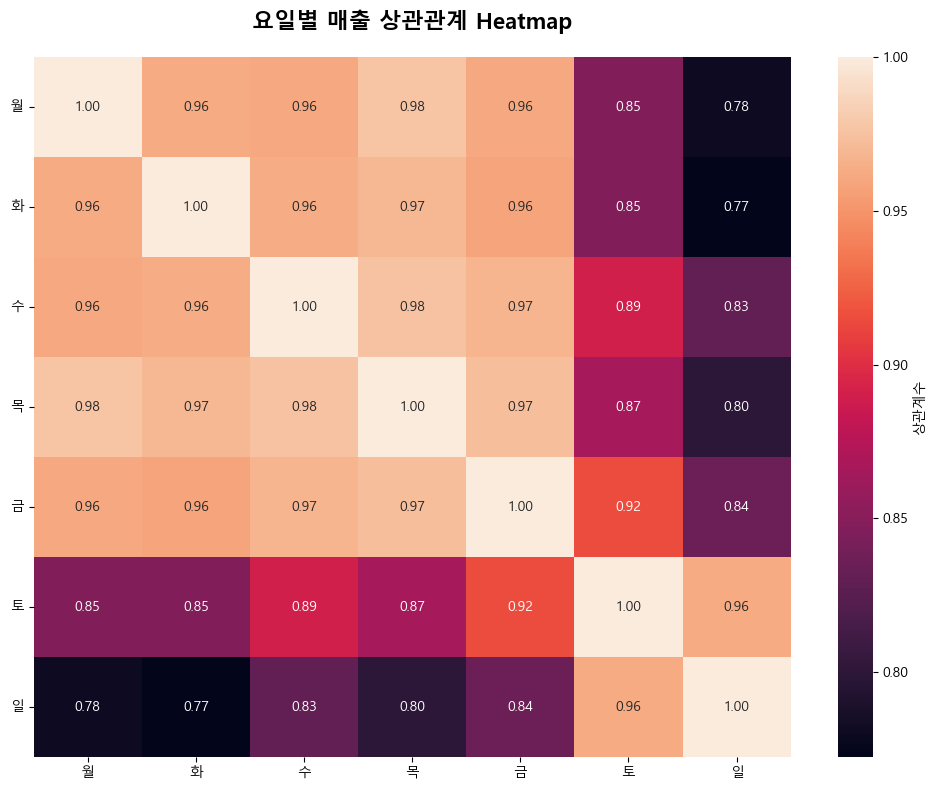

In [15]:
# 기본 Heatmap
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(weekday_corr,
            annot=True,  # 숫자 표시
            fmt='.2f',  # 소수점 2자리
            # cmap='coolwarm',  # 색상 맵 (파란색=낮음, 빨간색=높음)
            # center=0,  # 중심값
            # square=True,  # 정사각형 셀
            # linewidths=1,  # 셀 경계선
            cbar_kws={'label': '상관계수'},
            ax=ax)
# 그래프 꾸미기
ax.set_title('요일별 매출 상관관계 Heatmap', fontsize=16, fontweight='bold', pad=20)

# 축 레이블 간소화
ax.set_xticklabels(['월', '화', '수', '목', '금', '토', '일'], rotation=0)
ax.set_yticklabels(['월', '화', '수', '목', '금', '토', '일'], rotation=0)

plt.tight_layout()
plt.savefig('output/5_weekday_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

In [22]:
rename_cols = {}
for i in range(1,6):
    rename_cols[f"연령대{i*10}매출금액"] =  f'{i*10}대매출금액'

rename_cols["연령대60이상매출금액"] =  "60대이상매출금액"
seoul_df.rename(columns=rename_cols, inplace=True)
df = seoul_df

# 연령대10매출금액 -- 10대매출금액

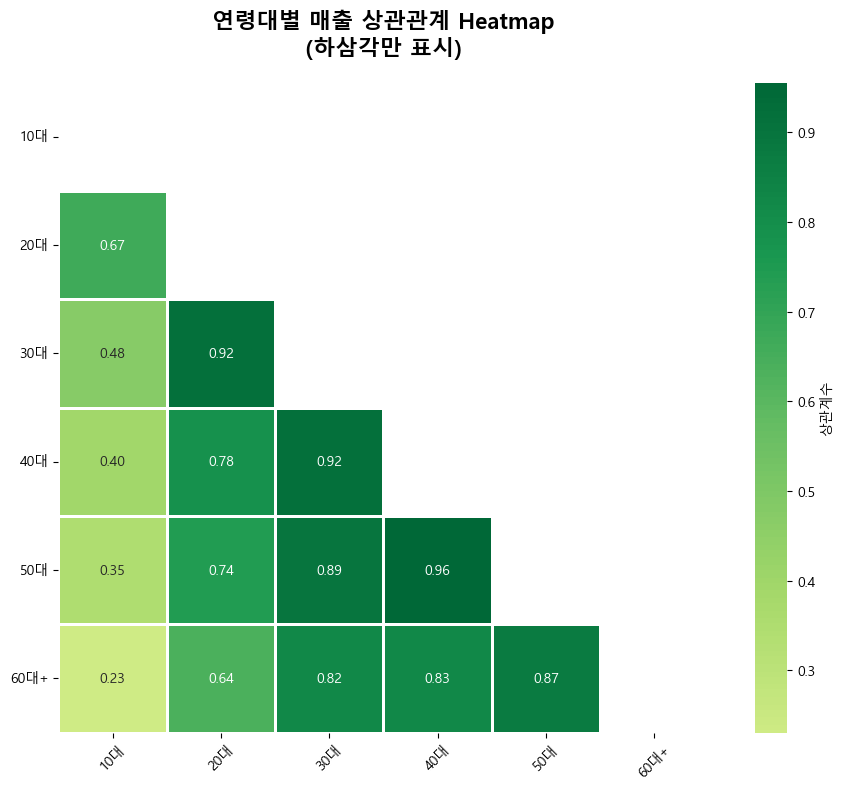


연령대별 매출 상관관계 분석

상관관계 상위 5개:
   연령대1  연령대2      상관계수
12  40대   50대  0.955355
9   30대   40대  0.915947
5   20대   30대  0.915770
10  30대   50대  0.894188
14  50대  60대+  0.874701


In [23]:
# 연령대별 매출 컬럼
age_columns = ['10대매출금액', '20대매출금액', '30대매출금액', 
               '40대매출금액', '50대매출금액', '60대이상매출금액']

# 상관행렬
age_corr = df[age_columns].corr()

# Heatmap
fig, ax = plt.subplots(figsize=(10, 8))

# 마스크 생성 (상삼각 부분 숨기기 - 중복 제거)
mask = np.triu(np.ones_like(age_corr, dtype=bool))

sns.heatmap(age_corr,
            mask=mask,  # 상삼각 부분 숨김
            annot=True,
            fmt='.2f',
            cmap='RdYlGn',  # 빨강-노랑-초록
            center=0,
            square=True,
            linewidths=1,
            cbar_kws={'label': '상관계수'},
            ax=ax)

# 그래프 꾸미기
ax.set_title('연령대별 매출 상관관계 Heatmap\n(하삼각만 표시)', 
             fontsize=16, fontweight='bold', pad=20)

# 축 레이블
age_labels = ['10대', '20대', '30대', '40대', '50대', '60대+']
ax.set_xticklabels(age_labels, rotation=45)
ax.set_yticklabels(age_labels, rotation=0)

plt.tight_layout()
plt.savefig('output/5_age_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# 가장 상관이 높은 연령대 쌍 찾기
print("\n" + "=" * 60)
print("연령대별 매출 상관관계 분석")
print("=" * 60)

# 대각선과 상삼각 제외
corr_pairs = []
for i in range(len(age_columns)):
    for j in range(i+1, len(age_columns)):
        corr_pairs.append({
            '연령대1': age_labels[i],
            '연령대2': age_labels[j],
            '상관계수': age_corr.iloc[i, j]
        })

corr_df = pd.DataFrame(corr_pairs).sort_values('상관계수', ascending=False)
print("\n상관관계 상위 5개:")
print(corr_df.head())

In [30]:
main_code_name = set(df['서비스업종코드명'].unique())
compare_code_name = set(['커피-음료', '한식음식점', '편의점', '치킨전문점', '의류'])
main_code_name & compare_code_name

{'치킨전문점', '커피-음료', '편의점', '한식음식점'}

In [41]:
def find_gu(x):
    if '강남' in x:
        return '강남구'
    elif '마포구'  in x:
        return '강남구'
    elif '종로구'  in x:
        return '종로구'
    elif '송파구'  in x:
        return '송파구'
    elif '영등포구'  in x:
        return '영등포구'
    else:
        return "기타"
df['행정구역명'] = df['상권코드명'].apply(find_gu)

In [44]:
df.rename(columns={
    '당월매출금액' : '월매출금액',
    '당월매출건수' : '월매출건수'
}, inplace=True)

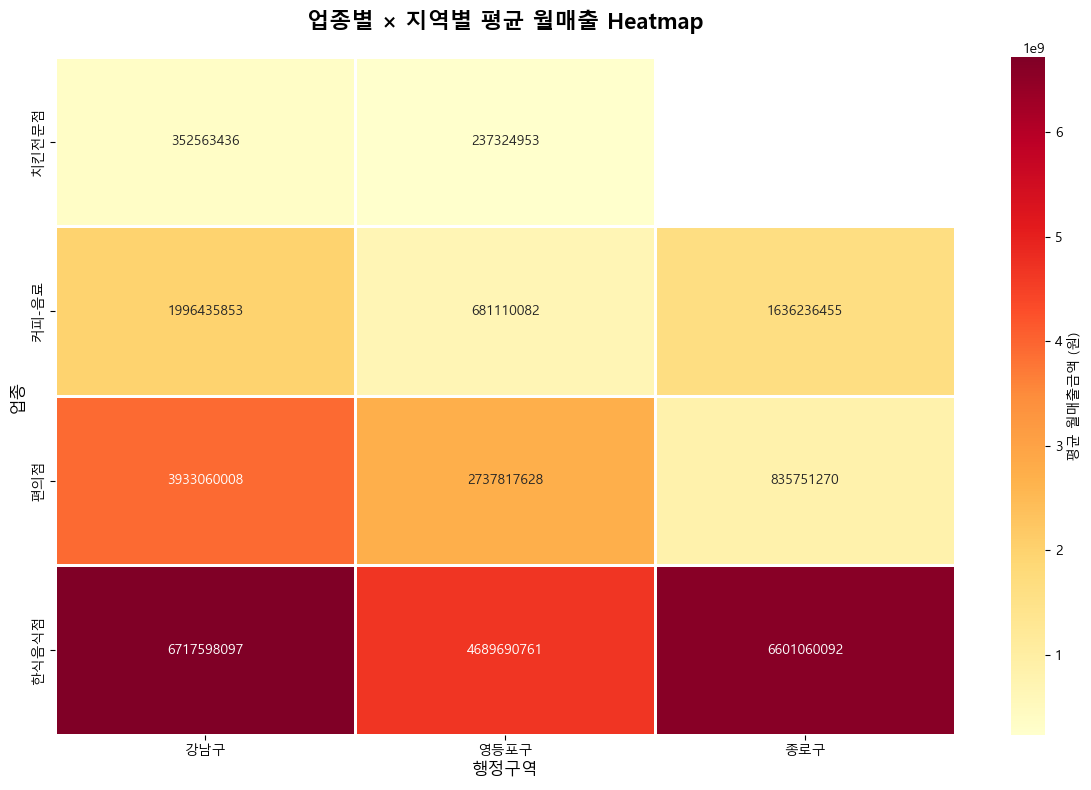


업종별 최고 매출 지역
커피-음료: 강남구 (1996.44M원)
한식음식점: 강남구 (6717.60M원)
편의점: 강남구 (3933.06M원)
치킨전문점: 강남구 (352.56M원)


In [46]:
# 주요 업종과 지역 선택
major_industries = ['커피-음료', '한식음식점', '편의점', '치킨전문점']
major_districts = ['강남구',  '종로구',  '영등포구']

# 필터링
df_major = df[(df['서비스업종코드명'].isin(major_industries)) & 
              (df['행정구역명'].isin(major_districts))]

# Pivot Table: 행=업종, 열=지역, 값=평균 월매출
pivot_industry_district = df_major.pivot_table(
    values='월매출금액',
    index='서비스업종코드명',
    columns='행정구역명',
    aggfunc='mean'
)

# Heatmap
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(pivot_industry_district,
            annot=True,
            fmt='.0f',  # 정수로 표시
            cmap='YlOrRd',  # 노랑-주황-빨강
            linewidths=1,
            cbar_kws={'label': '평균 월매출금액 (원)'},
            ax=ax)

# 그래프 꾸미기
ax.set_title('업종별 × 지역별 평균 월매출 Heatmap', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('행정구역', fontsize=12)
ax.set_ylabel('업종', fontsize=12)

plt.tight_layout()
plt.savefig('output/5_industry_district_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

# 각 업종별 최고 매출 지역
print("\n" + "=" * 60)
print("업종별 최고 매출 지역")
print("=" * 60)
for industry in major_industries:
    max_district = pivot_industry_district.loc[industry].idxmax()
    max_value = pivot_industry_district.loc[industry].max()
    print(f"{industry}: {max_district} ({max_value/1000000:.2f}M원)")

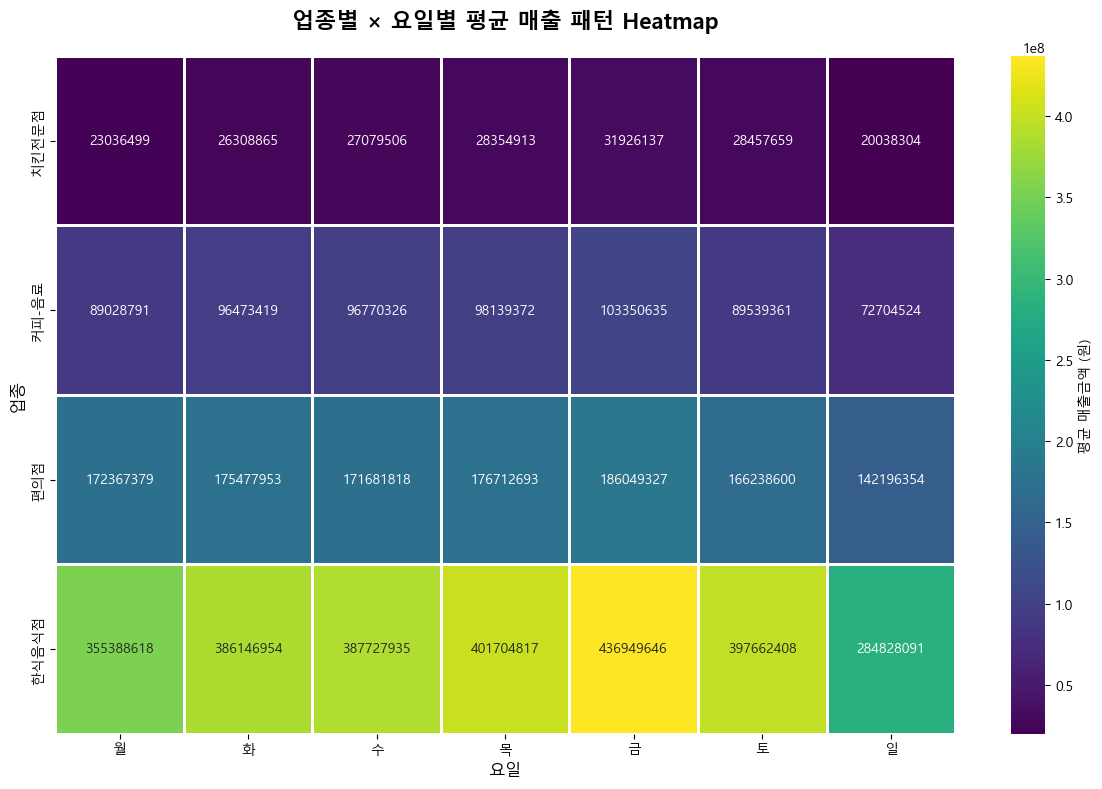

In [48]:
# 업종별 요일 평균 매출 계산
industry_weekday_data = []

for industry in major_industries:
    industry_df = df[df['서비스업종코드명'] == industry]
    for weekday_col in weekday_columns:
        avg_sales = industry_df[weekday_col].mean()
        weekday_name = weekday_col.replace('매출금액', '').replace('요일', '')
        
        industry_weekday_data.append({
            '업종': industry,
            '요일': weekday_name,
            '평균매출': avg_sales
        })

industry_weekday_df = pd.DataFrame(industry_weekday_data)

# Pivot Table
pivot_industry_weekday = industry_weekday_df.pivot_table(
    values='평균매출',
    index='업종',
    columns='요일',
    aggfunc='mean'
)

# 요일 순서 정렬
weekday_order = ['월', '화', '수', '목', '금', '토', '일']
pivot_industry_weekday = pivot_industry_weekday[weekday_order]

# Heatmap
fig, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(pivot_industry_weekday,
            annot=True,
            fmt='.0f',
            cmap='viridis',
            linewidths=1,
            cbar_kws={'label': '평균 매출금액 (원)'},
            ax=ax)

# 그래프 꾸미기
ax.set_title('업종별 × 요일별 평균 매출 패턴 Heatmap', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('요일', fontsize=12)
ax.set_ylabel('업종', fontsize=12)

plt.tight_layout()
plt.savefig('output/5_industry_weekday_pattern.png', dpi=300, bbox_inches='tight')
plt.show()